                                                 ECONOMIC DATA ANALYSIS

Reading Data and Basic Stats

In [52]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from ydata_profiling import ProfileReport
import ydata_profiling

In [46]:
# loading dataset
data = pd.read_csv('Cost_of_Living_Index_2022.csv')

In [6]:
data = data.dropna()

In [51]:
numeric_cols = ["Cost of Living Index", "Rent Index", "Groceries Index", "Restaurant Price Index"]
data[numeric_cols] = data[numeric_cols].apply(pd.to_numeric, errors="coerce")
data = data.dropna() 

In [45]:
# Display the first few rows of the dataset
print(data.head())

   Rank      Country  Cost of Living Index  Rent Index  \
0     1  Afghanistan                 20.37        2.72   
1     2      Albania                 35.50        8.47   
2     3      Algeria                 26.87        4.59   
3     4    Argentina                 34.69        7.71   
4     5      Armenia                 33.89       11.61   

   Cost of Living Plus Rent Index  Groceries Index  Restaurant Price Index  \
0                           12.09            14.92                   12.41   
1                           22.83            29.32                   25.82   
2                           16.43            28.82                   14.48   
3                           22.04            28.17                   33.32   
4                           23.45            27.59                   30.55   

   Local Purchasing Power Index  
0                         23.04  
1                         30.19  
2                         24.63  
3                         30.72  
4           

In [9]:
print(data.describe())

             Rank  Cost of Living Index  Rent Index  \
count  139.000000            139.000000  139.000000   
mean    70.000000             50.188633   19.291511   
std     40.269923             20.860222   15.317726   
min      1.000000             19.920000    2.720000   
25%     35.500000             34.715000    9.515000   
50%     70.000000             44.680000   13.930000   
75%    104.500000             62.580000   25.070000   
max    139.000000            146.040000   98.580000   

       Cost of Living Plus Rent Index  Groceries Index  \
count                      139.000000       139.000000   
mean                        35.705324        46.637842   
std                         17.542523        20.952229   
min                         12.090000        14.920000   
25%                         23.310000        31.200000   
50%                         31.260000        40.220000   
75%                         44.865000        56.590000   
max                        123.800000   

Data Cleaning

In [10]:
# checking for missing values
print(data.info())
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Rank                            139 non-null    int64  
 1   Country                         139 non-null    object 
 2   Cost of Living Index            139 non-null    float64
 3   Rent Index                      139 non-null    float64
 4   Cost of Living Plus Rent Index  139 non-null    float64
 5   Groceries Index                 139 non-null    float64
 6   Restaurant Price Index          139 non-null    float64
 7   Local Purchasing Power Index    139 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 8.8+ KB
None
Rank                              0
Country                           0
Cost of Living Index              0
Rent Index                        0
Cost of Living Plus Rent Index    0
Groceries Index                   0
Res

Exploratory Data Analysis 

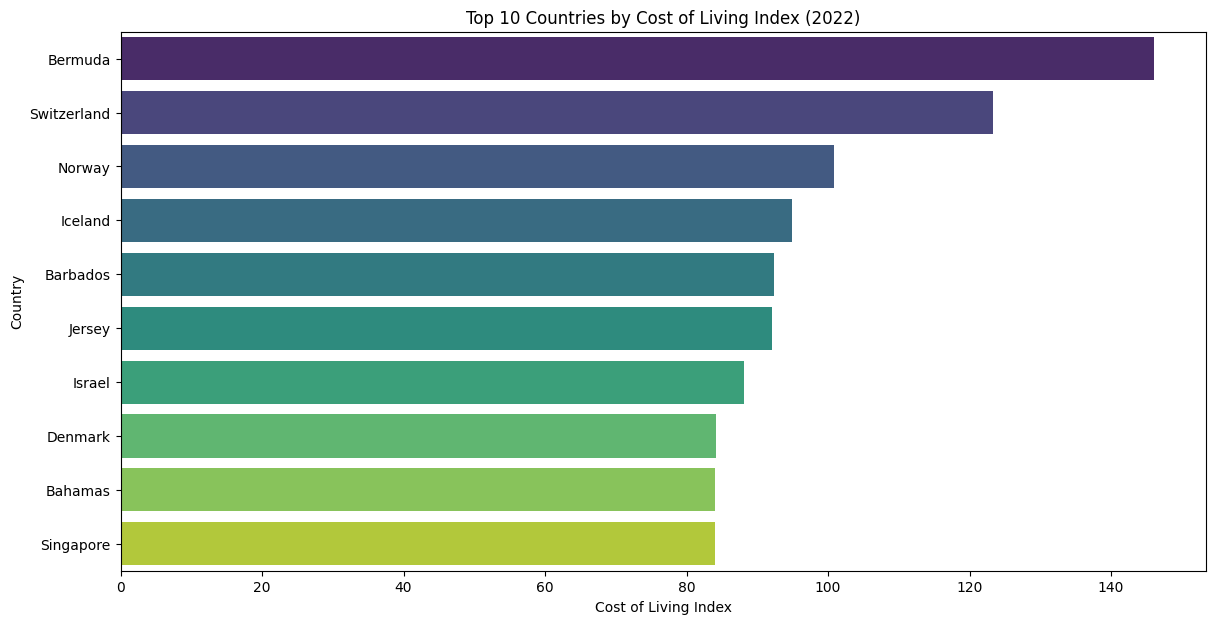

In [56]:
# ploting bar graph for Top 10 Countries by Cost of Living Index (2022)
if 'Country' in data.columns and 'Cost of Living Index' in data.columns:
    top_10_col = data.sort_values(by='Cost of Living Index', ascending=False).head(10)
    
    plt.figure(figsize=(14, 7))
    sns.barplot(data=top_10_col, x='Cost of Living Index', y='Country', hue='Country', palette='viridis')
    plt.title("Top 10 Countries by Cost of Living Index (2022)")
    plt.xlabel("Cost of Living Index")
    plt.ylabel("Country")
    plt.show()

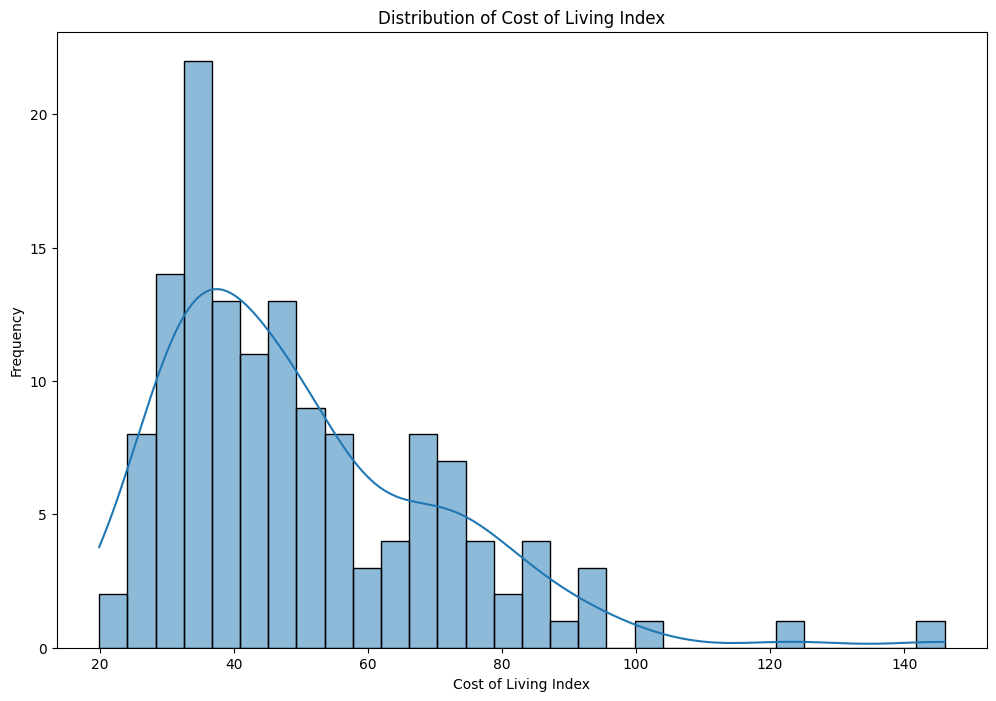

In [59]:
# ploting histogram for Distribution of Cost of Living Index
plt.figure(figsize=(12, 8))
sns.histplot(data["Cost of Living Index"], bins=30, kde=True)
plt.title("Distribution of Cost of Living Index")
plt.xlabel("Cost of Living Index")
plt.ylabel("Frequency")
plt.show()

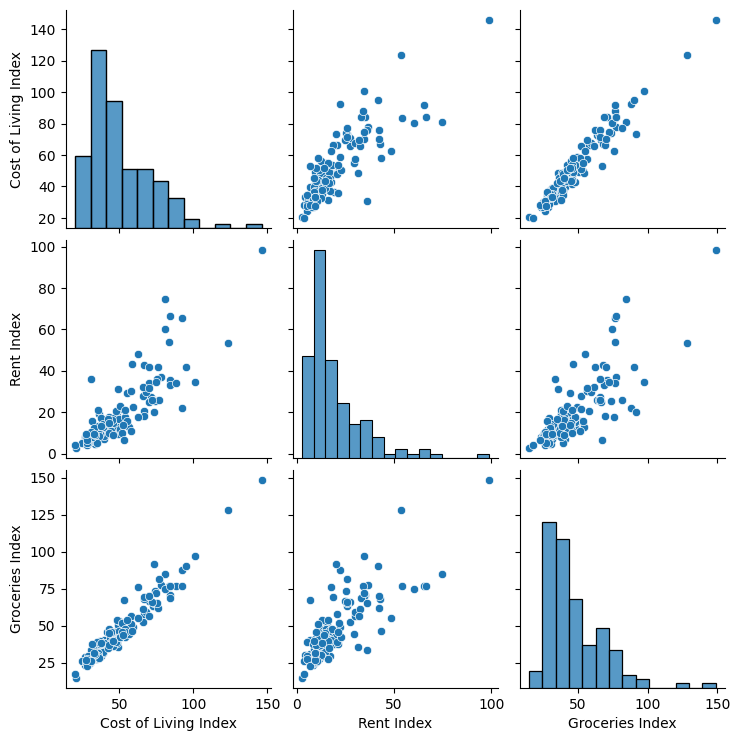

In [58]:
# ploting pairplot
sns.pairplot(data, vars=["Cost of Living Index", "Rent Index", "Groceries Index"])
plt.show()

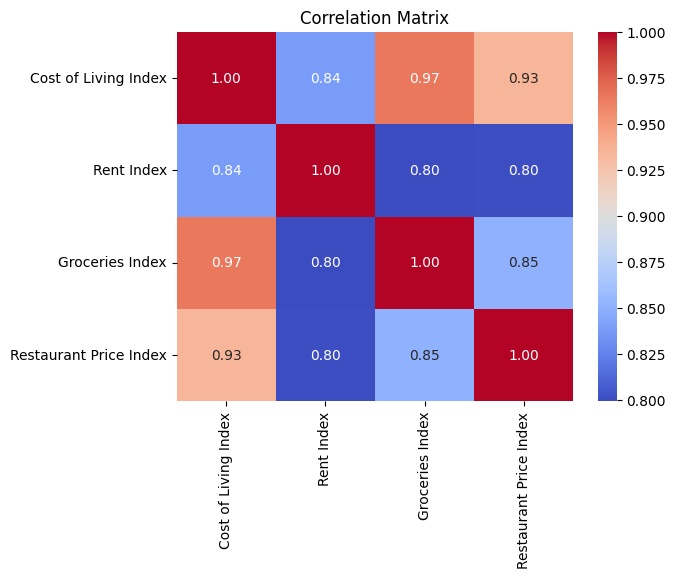

In [42]:
# ploting correlation matrix
correlation_matrix = data[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

Linear Regression

In [47]:
# seleting data 
X = data[["Rent Index", "Groceries Index", "Restaurant Price Index"]]
y = data["Cost of Living Index"]

In [35]:
# Assuming X and y are already defined
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
# selecting linear regression
model = LinearRegression()

In [38]:
# generating linear regression
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [39]:
# Predict on test set
y_pred = model.predict(X_test)

In [53]:
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 12.704851674030875


In [55]:
# Calculate R-squared
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

R-squared: 0.9679796409136949


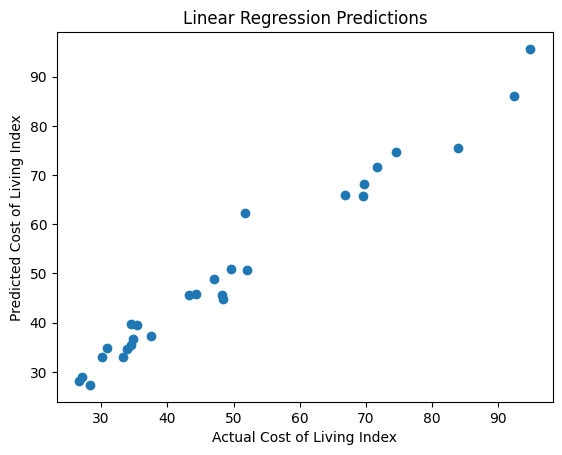

In [40]:
# ploting scatterplot for Linear Regression Predictions
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Cost of Living Index")
plt.ylabel("Predicted Cost of Living Index")
plt.title("Linear Regression Predictions")
plt.show()

Summary

In [17]:
# generating summary
profile= ProfileReport(data, title='Cost Of LIving Index 2022')

In [18]:
#summary
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 8/8 [00:00<00:00, 391.99it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [41]:
# summary report
summary_report = {
    "Mean Cost of Living Index": data["Cost of Living Index"].mean(),
    "Median Cost of Living Index": data["Cost of Living Index"].median(),
    "Top 10 Countries by Cost of Living": data.nlargest(10, "Cost of Living Index")["Country"].tolist()
}

print(summary_report)

{'Mean Cost of Living Index': np.float64(50.18863309352518), 'Median Cost of Living Index': np.float64(44.68), 'Top 10 Countries by Cost of Living': ['Bermuda', 'Switzerland', 'Norway', 'Iceland', 'Barbados', 'Jersey', 'Israel', 'Denmark', 'Bahamas', 'Singapore']}
